In [1]:
#Import necessary packages
import pandas as pd #DataFrame, data manipulation
from pandas import DataFrame
import numpy as np #array & numerical manipulation

from mlxtend.preprocessing import TransactionEncoder #transform original data for apriori algorithm
from mlxtend.frequent_patterns import apriori #Apriori algorithm
from mlxtend.frequent_patterns import association_rules #assc rules table

#Data visualizations
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings #ignore warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data, explore the data
data = pd.read_csv('C:/Users/12034/OneDrive/Documents/WGU/D212_MBA_med_raw.csv')
data.head(5)

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate XL,sulfamethoxazole,abilify,spironolactone,albuterol HFA,levofloxacin,promethazine,glipizide
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,citalopram,benicar,amphetamine salt combo xr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(15002, 20)

In [4]:
#Remove rows with NaN values
data = data[data['Presc01'].notna()]
data.shape

(7501, 20)

In [5]:
#DataFrame converted to list of lists
rows = []
for i in range (0, 7501):
                rows.append([str(data.values[i,j])
for j in range (0, 20)])

In [6]:
#Feed list to TransactionEncoder
DE = TransactionEncoder()
array = DE.fit(rows).transform(rows)

#Convert array to DataFrame
transaction = pd.DataFrame(array, columns = DE.columns_)

In [7]:
transaction

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,...,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
#View all columns
for col in transaction.columns:
        print(col)

Duloxetine
Premarin
Yaz
abilify
acetaminophen
actonel
albuterol HFA
albuterol aerosol
alendronate
allopurinol
alprazolam
amitriptyline
amlodipine
amoxicillin
amphetamine
amphetamine salt combo
amphetamine salt combo xr
atenolol
atorvastatin
azithromycin
benazepril
benicar
boniva
bupropion sr
carisoprodol
carvedilol
cefdinir
celebrex
celecoxib
cephalexin
cialis
ciprofloxacin
citalopram
clavulanate K+
clonazepam
clonidine HCI
clopidogrel
clotrimazole
codeine
crestor
cyclobenzaprine
cymbalta
dextroamphetamine XR
diazepam
diclofenac sodium
doxycycline hyclate
enalapril
escitalopram
esomeprazole
ezetimibe
fenofibrate
fexofenadine
finasteride
flovent hfa 110mcg inhaler
fluconozole
fluoxetine HCI
fluticasone
fluticasone nasal spray
folic acid
furosemide
gabapentin
glimepiride
glipizide
glyburide
hydrochlorothiazide
hydrocodone
hydrocortisone 2.5% cream
ibuprophen
isosorbide mononitrate
lansoprazole
lantus
levofloxacin
levothyroxine sodium
lisinopril
lorazepam
losartan
lovastatin
meloxicam
met

In [9]:
#Remove NaN columns from the dataset
cleaned_df = transaction.drop(['nan'], axis = 1)
cleaned_df.head(7505)

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,...,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
#Confirm # rows and columns
cleaned_df.shape

(7501, 119)

In [11]:
#Export cleaned dataset to csv
cleaned_df.to_csv('C:/Users/12034/OneDrive/Documents/WGU/D212_T3_MV_MBA_clean.csv')

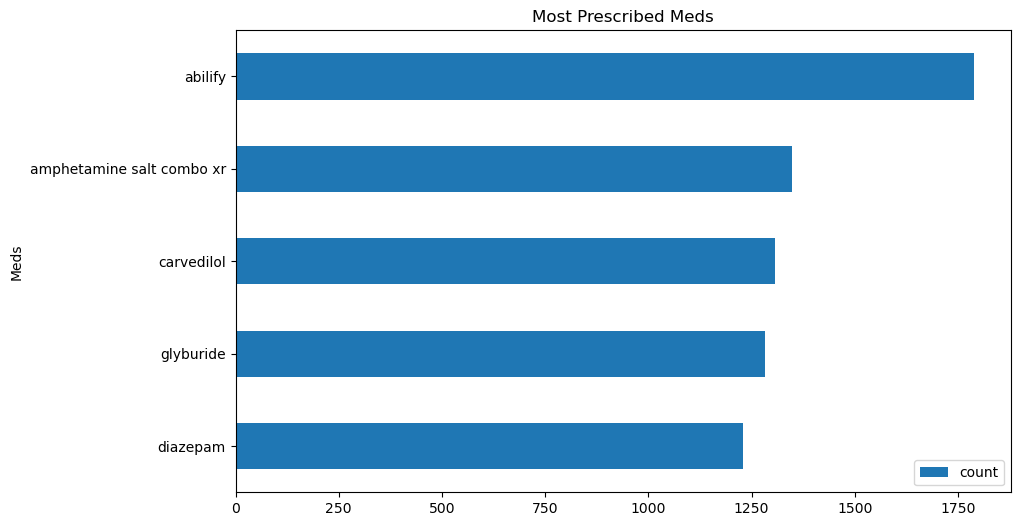

In [12]:
#Plot top 5 most prescribed meds
count = cleaned_df.loc[:,:].sum(axis=0)
most_presc = count.sort_values(ascending = False).head(5)
most_presc = most_presc.to_frame()
most_presc = most_presc.reset_index()
most_presc = most_presc.rename(columns = {'index': 'Meds',0: 'count'})

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
ax = most_presc.plot.barh(x = 'Meds', y = 'count')
plt.title('Most Prescribed Meds')
plt.gca().invert_yaxis()

In [13]:
#Create Apriori algorithm
rules = apriori(cleaned_df, min_support = 0.02, use_colnames = True)
rules.head(5)

,support,itemsets
0,0.046794,(Premarin)
1,0.238368,(abilify)
2,0.020397,(albuterol aerosol)
3,0.033329,(allopurinol)
4,0.079323,(alprazolam)


In [14]:
print(len(rules))

103


In [15]:
#Create association rules table
#Note: Kept getting error to include num_itemsets argument for association_rules() fx so included below
rul_table = association_rules(rules, metric = 'lift', min_threshold = 1, num_itemsets = len(rules))
print(len(rul_table))
rul_table.head(20)

94


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(abilify),(amlodipine),0.238368,0.071457,0.023597,0.098993,1.385352,1.0,0.006564,1.030562,0.365218,0.082441,0.029655,0.214609
1,(amlodipine),(abilify),0.071457,0.238368,0.023597,0.330224,1.385352,1.0,0.006564,1.137144,0.299568,0.082441,0.120604,0.214609
2,(abilify),(amphetamine salt combo),0.238368,0.068391,0.024397,0.102349,1.496530,1.0,0.008095,1.037830,0.435627,0.086402,0.036451,0.229537
3,(amphetamine salt combo),(abilify),0.068391,0.238368,0.024397,0.356725,1.496530,1.0,0.008095,1.183991,0.356144,0.086402,0.155399,0.229537
4,(abilify),(amphetamine salt combo xr),0.238368,0.179709,0.050927,0.213647,1.188845,1.0,0.008090,1.043158,0.208562,0.138707,0.041372,0.248515
5,(amphetamine salt combo xr),(abilify),0.179709,0.238368,0.050927,0.283383,1.188845,1.0,0.008090,1.062815,0.193648,0.138707,0.059103,0.248515
6,(abilify),(atorvastatin),0.238368,0.129583,0.047994,0.201342,1.553774,1.0,0.017105,1.089850,0.467950,0.150000,0.082443,0.285856
7,(atorvastatin),(abilify),0.129583,0.238368,0.047994,0.370370,1.553774,1.0,0.017105,1.209650,0.409465,0.150000,0.173315,0.285856
8,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,1.0,0.018223,1.159314,0.369437,0.169312,0.137421,0.296796
9,(abilify),(carvedilol),0.238368,0.174110,0.059725,0.250559,1.439085,1.0,0.018223,1.102008,0.400606,0.169312,0.092566,0.296796


In [16]:
top_three_rules = rul_table.sort_values('lift', ascending=False).head(3)
top_three_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
74,(carvedilol),(lisinopril),0.174110,0.098254,0.039195,0.225115,2.291162,1.0,0.022088,1.163716,0.682343,0.168096,0.140684,0.312015
75,(lisinopril),(carvedilol),0.098254,0.174110,0.039195,0.398915,2.291162,1.0,0.022088,1.373997,0.624943,0.168096,0.272197,0.312015
73,(glipizide),(carvedilol),0.065858,0.174110,0.022930,0.348178,1.999758,1.0,0.011464,1.267048,0.535186,0.105651,0.210764,0.239939


In [17]:
top_three_rules = rul_table.sort_values('support', ascending=False).head(3)
top_three_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
8,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,1.0,0.018223,1.159314,0.369437,0.169312,0.137421,0.296796
9,(abilify),(carvedilol),0.238368,0.174110,0.059725,0.250559,1.439085,1.0,0.018223,1.102008,0.400606,0.169312,0.092566,0.296796
19,(diazepam),(abilify),0.163845,0.238368,0.052660,0.321400,1.348332,1.0,0.013604,1.122357,0.308965,0.150648,0.109018,0.271158


In [18]:
top_three_rules = rul_table.sort_values('confidence', ascending=False).head(3)
top_three_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
31,(metformin),(abilify),0.050527,0.238368,0.023064,0.456464,1.914955,1.0,0.011020,1.401255,0.503221,0.086760,0.286354,0.276610
25,(glipizide),(abilify),0.065858,0.238368,0.027596,0.419028,1.757904,1.0,0.011898,1.310962,0.461536,0.099759,0.237201,0.267400
29,(lisinopril),(abilify),0.098254,0.238368,0.040928,0.416554,1.747522,1.0,0.017507,1.305401,0.474369,0.138413,0.233952,0.294127
